In [ ]:
!pip install gradio scikit-learn matplotlib tensorflow -q

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.neighbors import KDTree

In [ ]:
from tensorflow.keras.datasets import mnist

In [ ]:
import gradio as gr
from PIL import Image

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
X_train_flat = X_train.reshape(len(X_train), -1) / 255.0
X_test_flat = X_test.reshape(len(X_test), -1) / 255.0

In [ ]:
pca = PCA(n_components=50, random_state=42)

In [ ]:
X_train_pca = pca.fit_transform(X_train_flat)
X_test_pca = pca.transform(X_test_flat)

In [ ]:
tree = KDTree(X_train_pca, leaf_size=40)

In [ ]:
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = mnist.load_data()

print("Train data:", x_train.shape, y_train.shape)  # (60000, 28, 28), (60000,)
print("Test data:", x_test.shape, y_test.shape)    # (10000, 28, 28), (10000,)

Train data: (60000, 28, 28) (60000,)
Test data: (10000, 28, 28) (10000,)


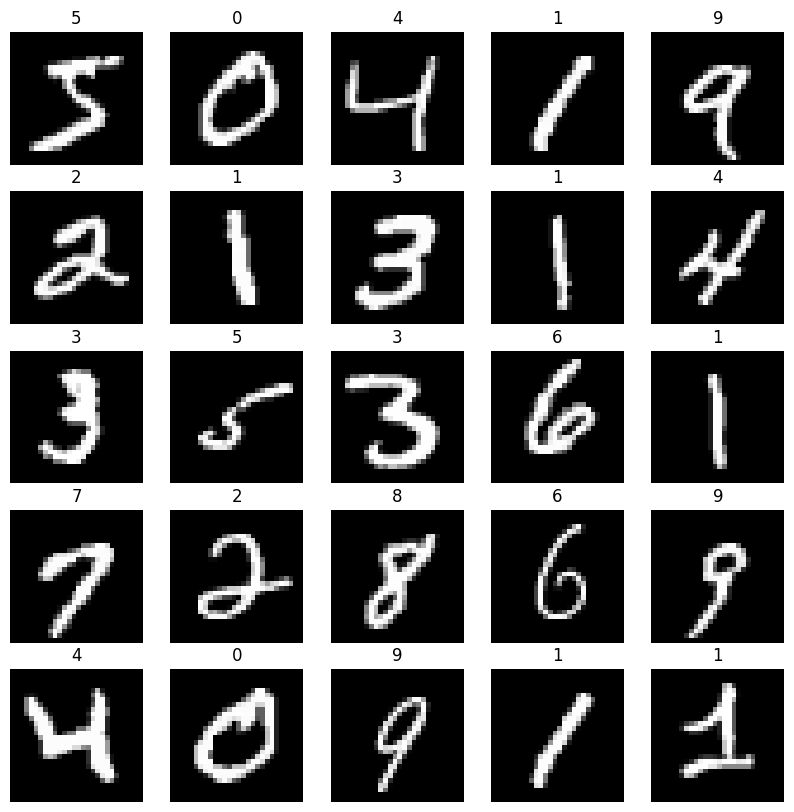

In [ ]:
import numpy as np

plt.figure(figsize=(10,10))
for i in range(25):   # show first 25 images
    plt.subplot(5,5,i+1)
    plt.imshow(x_train[i], cmap="gray")
    plt.title(f"{y_train[i]}")
    plt.axis("off")
plt.show()


In [ ]:
labels_map = [
    "Zero", "One", "Two", "Three", "Four",
    "Five", "Six", "Seven", "Eight", "Nine"
]


In [ ]:
dist, ind = tree.query(X_test_pca[:1000], k=1)  # test on 1k samples
y_pred = y_train[ind.flatten()]
acc = np.mean(y_pred == y_test[:1000])
print("Retrieval Accuracy (Top-1):", acc)

Retrieval Accuracy (Top-1): 0.967


In [ ]:
def find_similar(img):
    img_gray = img.convert("L")   # ensure grayscale
    img_resized = img_gray.resize((28,28))
    img_flat = np.array(img_resized).flatten().reshape(1, -1) / 255.0
    img_pca = pca.transform(img_flat)

    dist, ind = tree.query(img_pca, k=5)
    neighbors = ind[0]

    results = []
    captions = []
    for i in neighbors:
        results.append(Image.fromarray(X_train[i]))
        captions.append(labels_map[y_train[i]])
    return results, {labels_map[y_train[i]]: 1.0 for i in neighbors}

In [ ]:
with gr.Blocks() as demo:
    gr.Markdown("## MNIST Digit Similarity Project")

    with gr.Row():
        inp = gr.Image(type="pil", label="Upload a digit image")
        gallery = gr.Gallery(label="Most Similar Digits (Top-5)", columns=5, height="auto")
    out_labels = gr.Label(num_top_classes=5, label="Predicted Similar Digits")

    inp.upload(find_similar, inputs=inp, outputs=[gallery, out_labels])

In [ ]:
demo.launch()

It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://d02a74889d4d948cec.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
